# Ripley's K Demo: 02 K test
* Use previously generated point process for Ripley's K test 
* The default size of point process generator is 20 x 20
* Please visit the code on my [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)

In [14]:
# denpendency 
import os, sys
import scipy.stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import spatialstat.ppsim as ppsim
import spatialstat.spatialpattern as spatialpattern

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# define IO dir
path = '.'
opdir = os.path.join(path, 'output')
opdir_csv = os.path.join(opdir, 'csv')
opdir_fig = os.path.join(opdir, 'figure')

# load point processes
filename = 'P_PoissonPP_20'
inputpath = os.path.join(opdir_csv, filename + '.csv')
P_PoissonPP = pd.read_csv(inputpath)
P_PoissonPP = np.array(P_PoissonPP)

filename = 'P_ThomasPP_20'
inputpath = os.path.join(opdir_csv, filename + '.csv')
P_ThomasPP = pd.read_csv(inputpath)
P_ThomasPP = np.array(P_ThomasPP)

## Running Ripley's K test
1. [GitHub](https://github.com/eufmike/Ripleys_K_function_demo)
2. Define maximum radius (rmax) in Ripley's K test (the maximum distance $t$)
3. Instead of using edge correction, the current code offset the maximum radius from the edge, and only perform K test in offset region.
4. run `spatialpattern.spest` and return K_r, L_r, H_r, RList, densitylist. 

In [16]:
# Define offset region
rmax = 5
Dx = 20
Dy = 20
xmin = 0 + rmax
xmax = Dx - rmax
ymin = 0 + rmax
ymax = Dx - rmax

# Create offset point pattern
P_PoissonPP_center = ppsim.xyroi_idx(P_PoissonPP, xmin, xmax, ymin, ymax)
P_ThomasPP_center = ppsim.xyroi_idx(P_ThomasPP, xmin, xmax, ymin, ymax)

In [17]:
P_PoissonPP_density = ppsim.xydensity(P_PoissonPP, Dx = Dx) [0]
P_ThomasPP_density = ppsim.xydensity(P_ThomasPP, Dx = Dx) [0]
print("The density of Poisson PP: {}".format(P_PoissonPP_density))
print("The density of Thomas PP: {}".format(P_ThomasPP_density))

The density of Poisson PP: 1.0
The density of Thomas PP: 4.745


In [18]:
print(P_PoissonPP_center)

[[  5.43671429   6.25346168   3.        ]
 [  7.11326183  12.33114888  13.        ]
 [ 13.33606101  11.22544725  15.        ]
 [  6.39472969   7.42321696  19.        ]
 [ 11.38826194  11.38610236  22.        ]
 [ 10.06734122  11.67408033  24.        ]
 [ 13.35328412   9.52626947  25.        ]
 [ 12.9212211   12.35402024  35.        ]
 [ 11.66923395   6.02137242  36.        ]
 [  8.84745164   8.84464467  40.        ]
 [ 11.11391375  11.77771216  47.        ]
 [  8.51311965   6.84417874  49.        ]
 [  5.38755171   6.10301544  51.        ]
 [ 11.98040037   6.15086931  52.        ]
 [  6.01724989   5.30329897  54.        ]
 [ 13.24869222   8.28882357  61.        ]
 [ 14.99331276   6.64488497  62.        ]
 [ 10.62909785  14.42641951  63.        ]
 [  9.65620253   9.47694603  64.        ]
 [  5.98644492   7.42039626  74.        ]
 [ 11.53096234   7.44592738  80.        ]
 [ 12.36363951   6.10800367  89.        ]
 [  7.94556968  11.13820888  91.        ]
 [  8.94461667  14.37002052  92.  

In [20]:
K_r, L_r, H_r, RList, densitylist = spatialpattern.spest(input_array_ref = P_PoissonPP_center, 
                        input_array_all = P_PoissonPP,
                        function = 'all', 
                        density = P_PoissonPP_density, 
                        rstart = 0, rend = 5, rstep = 0.01)

0%|          | 0/102 [00:00<?, ?it/s][[  0.           5.43671429   6.25346168   3.        ]
 [  1.           7.11326183  12.33114888  13.        ]
 [  2.          13.33606101  11.22544725  15.        ]
 [  3.           6.39472969   7.42321696  19.        ]
 [  4.          11.38826194  11.38610236  22.        ]
 [  5.          10.06734122  11.67408033  24.        ]
 [  6.          13.35328412   9.52626947  25.        ]
 [  7.          12.9212211   12.35402024  35.        ]
 [  8.          11.66923395   6.02137242  36.        ]
 [  9.           8.84745164   8.84464467  40.        ]
 [ 10.          11.11391375  11.77771216  47.        ]
 [ 11.           8.51311965   6.84417874  49.        ]
 [ 12.           5.38755171   6.10301544  51.        ]
 [ 13.          11.98040037   6.15086931  52.        ]
 [ 14.           6.01724989   5.30329897  54.        ]
 [ 15.          13.24869222   8.28882357  61.        ]
 [ 16.          14.99331276   6.64488497  62.        ]
 [ 17.          10.62909785 

ValueError: operands could not be broadcast together with shapes (101,2) (3,) 

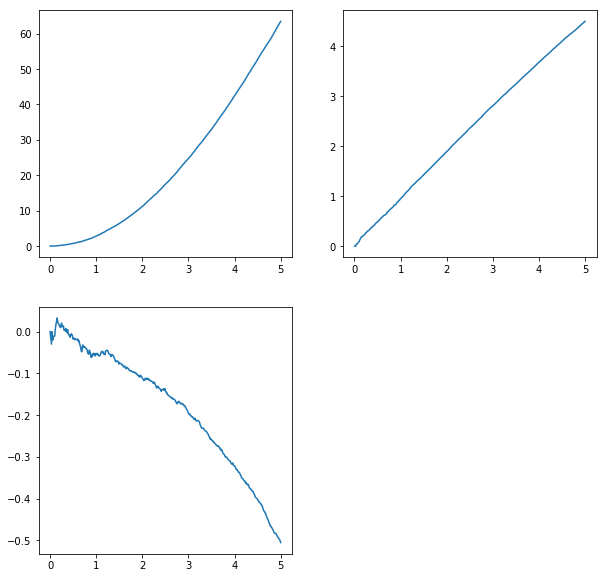

In [6]:
# plot
plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0

plot_1 = plt.subplot(221)
plot_1.plot(RList, K_r)
plot_2 = plt.subplot(222)
plot_2.plot(RList, L_r)
plot_3 = plt.subplot(223)
plot_3.plot(RList, H_r)

In [7]:
K_r, L_r, H_r, RList, densitylist = spatialpattern.spest(input_array_ref = P_ThomasPP_center, 
                        input_array_all = P_ThomasPP,
                        function = 'all', 
                        density = P_ThomasPP_density, 
                        rstart = 0, rend = 5, rstep = 0.01)

0%|          | 0/410 [00:00<?, ?it/s][[0.00000000e+00 1.47374580e+01 9.80173053e+00 4.90000000e+01]
 [1.00000000e+00 1.42714691e+01 9.70553344e+00 5.00000000e+01]
 [2.00000000e+00 1.43193071e+01 9.77559851e+00 5.10000000e+01]
 ...
 [4.07000000e+02 8.42891240e+00 1.31502353e+01 1.70500000e+03]
 [4.08000000e+02 8.96369074e+00 1.33099087e+01 1.70600000e+03]
 [4.09000000e+02 1.44605975e+01 1.44904469e+01 1.81400000e+03]]
9.737458035097935 19.737458035097937 4.801730530171897 14.801730530171897



ValueError: operands could not be broadcast together with shapes (642,2) (3,) 

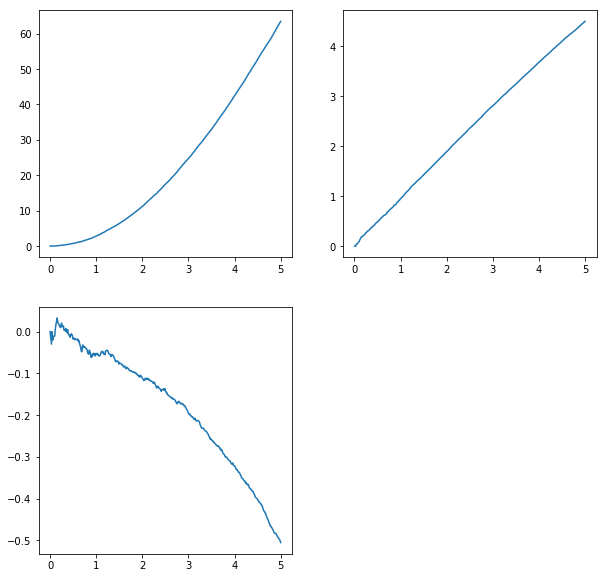

In [8]:
# plot
plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0

plot_1 = plt.subplot(221)
plot_1.plot(RList, K_r)
plot_2 = plt.subplot(222)
plot_2.plot(RList, L_r)
plot_3 = plt.subplot(223)
plot_3.plot(RList, H_r)